# problem statement
## To build the model for best Decision surface 

In [1]:
# importing the required libraries
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense,BatchNormalization
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df = pd.read_csv(r"C:\Users\HAREESH\Downloads\DL\DL assignments\DL projects\Assignment - 4\3.concertriccir2.csv",header= None)
df

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [13]:
# checking the null values
df.isnull().sum()


0    0
1    0
2    0
dtype: int64

In [14]:
# duplicates checking 
df.duplicated().sum()

0

In [15]:
# renaming the column names
df.columns=["X1","X2","Target_feature"]
df.head()

,X1,X2,Target_feature
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [16]:
df["Target_feature"]=df["Target_feature"].astype("int64")
df.dtypes

X1                float64
X2                float64
Target_feature      int64
dtype: object

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,500.0,1.883707,1.931275,-3.950019,0.403585,2.191547,3.349001,6.712027
X2,500.0,1.869874,1.986852,-3.935098,0.426457,2.109658,3.388552,7.848278
Target_feature,500.0,0.500000,0.500501,0.000000,0.000000,0.500000,1.000000,1.000000


In [18]:
df.corr()

,X1,X2,Target_feature
X1,1.000000,0.519671,-0.009216
X2,0.519671,1.000000,-0.013545
Target_feature,-0.009216,-0.013545,1.000000


In [19]:
df.skew()

X1               -0.318377
X2               -0.282709
Target_feature    0.000000
dtype: float64

In [20]:
df.kurt()

X1               -0.498068
X2               -0.456640
Target_feature   -2.008048
dtype: float64

In [27]:
# boxplot and hist plot  kde plot
from scipy import stats
def uni_visual(df):
  for i in df:
    print("*"*15,i,"*"*15)
    sns.boxplot(x=i,data=df)
    plt.title(f"boxplot of{i}")
    plt.show()


    # histogram
    print("*"*15,i,"*"*15)
    df[i].plot(kind="hist")
    plt.title(f"histogram  of {i}")
    plt.show()


    # density plot
    print("*"*15,i,"*"*15)
    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")
    plt.show()

    # qq plot normal distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.title(f"normal distribution of {i}")
    plt.grid()
    plt.show()
    
    
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="uniform",plot=plt)
    plt.title(f"uniform distribution of {i}")
    plt.grid()
    plt.show()




    skew_ = df[i].skew()
    print("skewness",skew_)

    kurt_ = df[i].kurt()
    print("kurtosis",kurt_)
    
    dec_ = df[i].describe().T
    print(dec_)


*************** X1 ***************


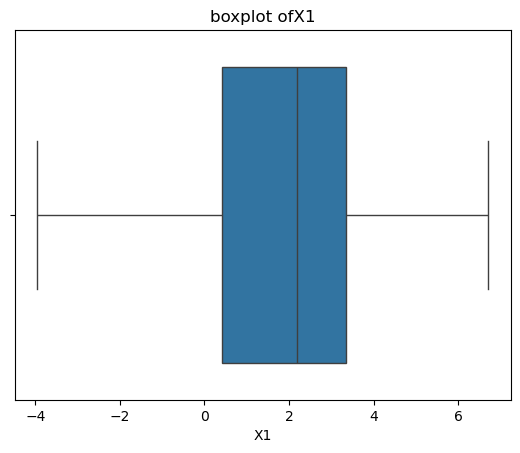

*************** X1 ***************


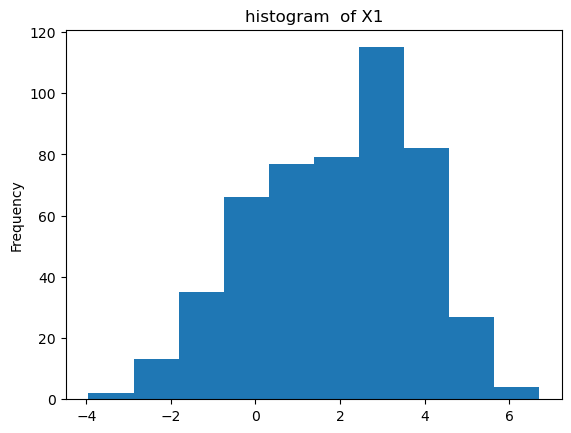

*************** X1 ***************


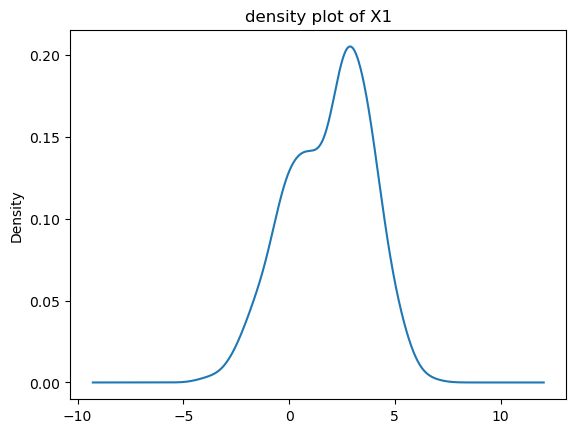

*************** X1 ***************


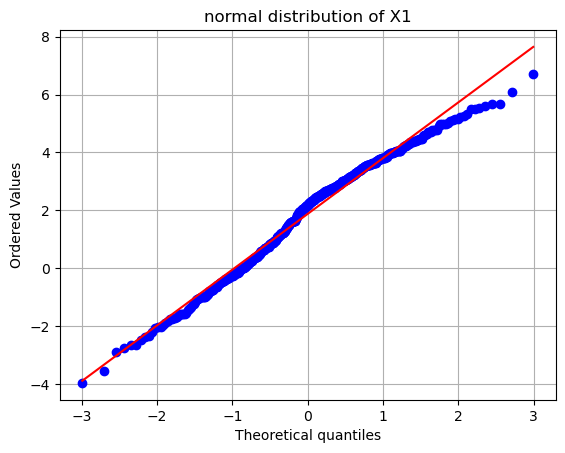

*************** X1 ***************


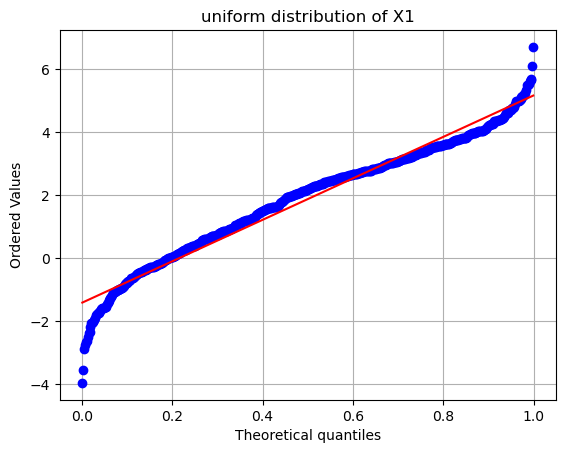

skewness -0.318377489252044
kurtosis -0.498067528838241
count    500.000000
mean       1.883707
std        1.931275
min       -3.950019
25%        0.403585
50%        2.191547
75%        3.349001
max        6.712027
Name: X1, dtype: float64
*************** X2 ***************


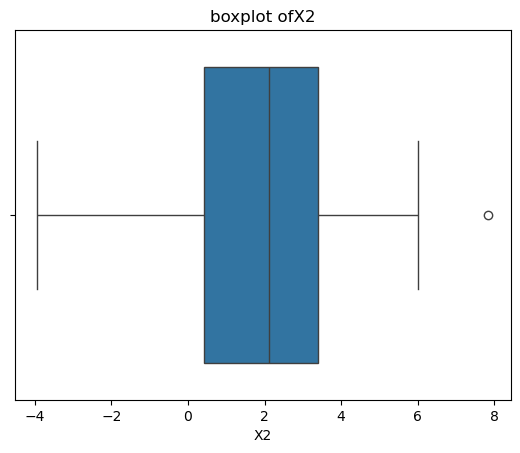

*************** X2 ***************


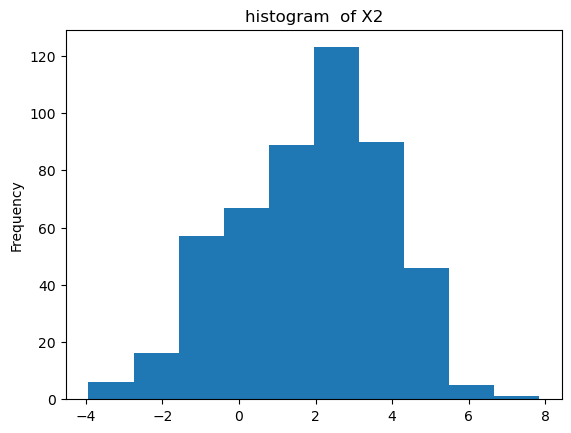

*************** X2 ***************


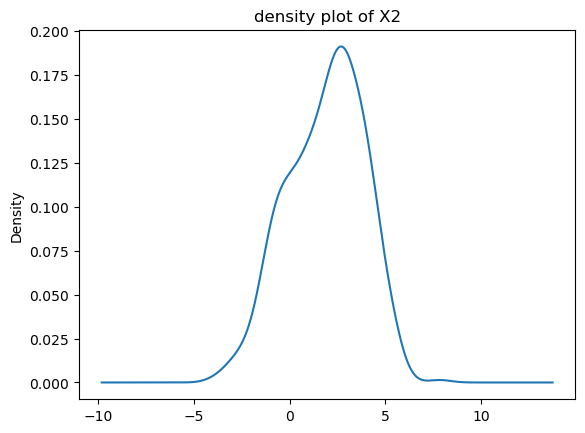

*************** X2 ***************


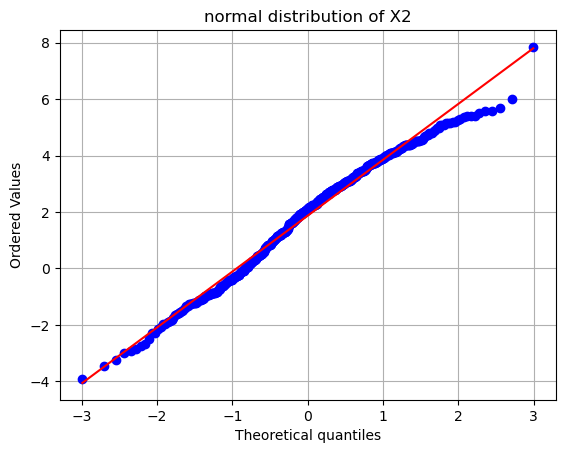

*************** X2 ***************


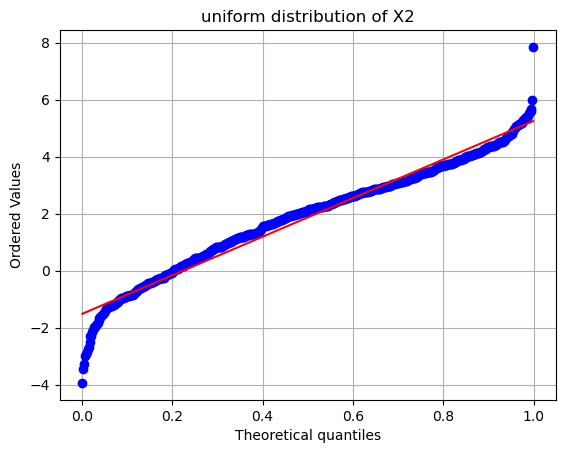

skewness -0.28270915142453057
kurtosis -0.45663989327299914
count    500.000000
mean       1.869874
std        1.986852
min       -3.935098
25%        0.426457
50%        2.109658
75%        3.388552
max        7.848278
Name: X2, dtype: float64
*************** Target_feature ***************


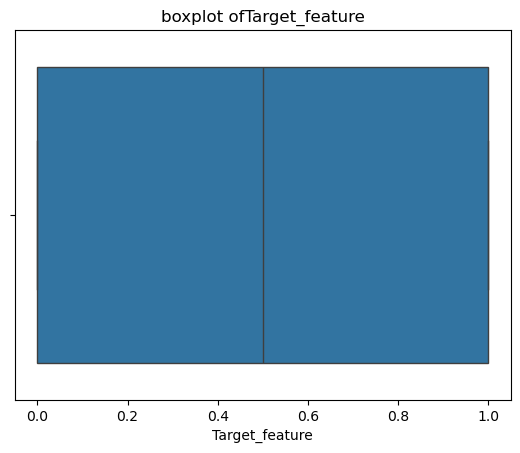

*************** Target_feature ***************


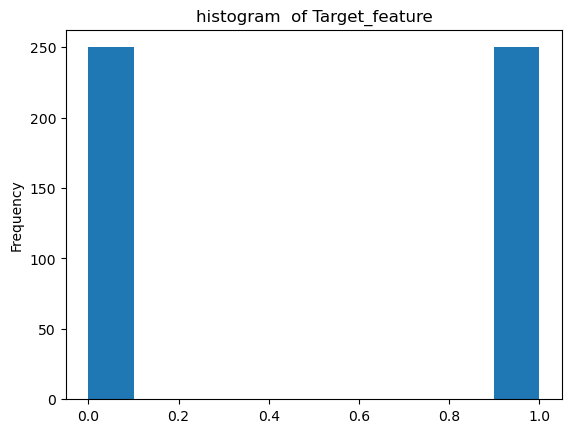

*************** Target_feature ***************


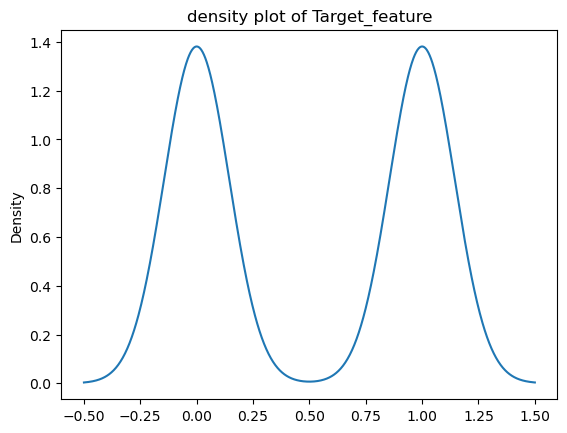

*************** Target_feature ***************


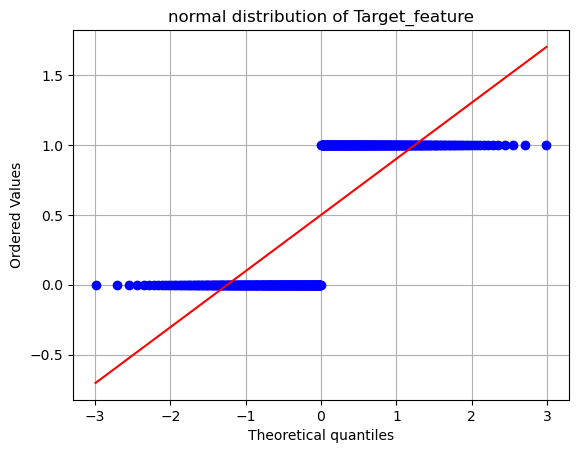

*************** Target_feature ***************


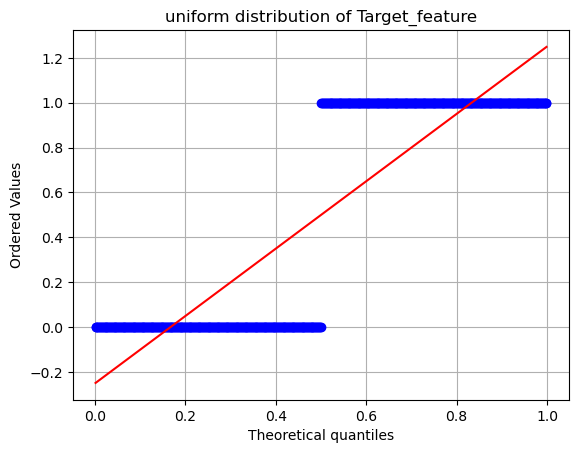

skewness 0.0
kurtosis -2.0080482897384306
count    500.000000
mean       0.500000
std        0.500501
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Target_feature, dtype: float64


In [28]:
uni_visual(df)

Text(0.5, 1.0, 'frquency count of target feature')

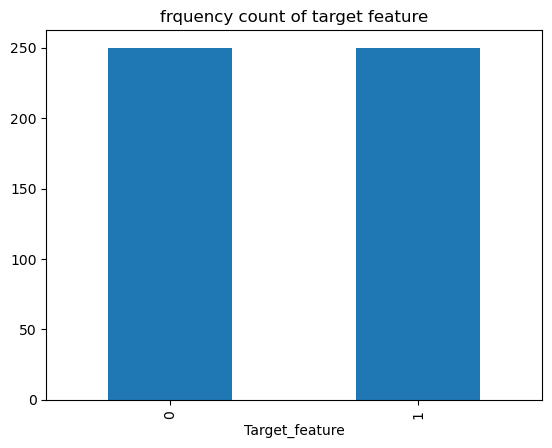

In [31]:
df["Target_feature"].value_counts().plot(kind="bar")
plt.title("frquency count of target feature")

# Observations
- There are no outliers in X1 and it is normally distributed
- THe X2 have one outlier in the data and normally distributed
- The taget feature  is balanced data 250 and 250

In [32]:
x = df.iloc[:,0:2]
y =df.iloc[:,-1]

In [34]:
# spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


In [36]:
# preprocessing the train data
std = StandardScaler() # creating the object to standardScaler
x_train = std.fit_transform(x_train)


In [37]:
# preprocessing the test data
x_test = std.transform(x_test)


In [338]:
# creating the neural network
model = Sequential()
model.add(Dense(10,activation="tanh",use_bias=True,kernel_regularizer=L1(0.04),bias_regularizer=L1(0.04),input_dim=2))
model.add(BatchNormalization())
model.add(Dense(8,activation="tanh",use_bias=True,kernel_regularizer=L1(0.04),bias_regularizer=L1(0.04)))
model.add(BatchNormalization())

model.add(Dense(5,activation="tanh",use_bias=True,kernel_regularizer=L1(0.04),bias_regularizer=L1(0.04)))
model.add(BatchNormalization())

model.add(Dense(3,activation="tanh",use_bias=True,kernel_regularizer=L1(0.04),bias_regularizer=L1(0.04)))

model.add(Dense(1,activation="sigmoid",use_bias=True,kernel_regularizer=L1(0.04),bias_regularizer=L1(0.04)))

In [339]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 10)                30        
                                                                 
 batch_normalization_72 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_121 (Dense)           (None, 8)                 88        
                                                                 
 batch_normalization_73 (Ba  (None, 8)                 32        
 tchNormalization)                                               
                                                                 
 dense_122 (Dense)           (None, 5)                 45        
                                                                 
 batch_normalization_74 (Ba  (None, 5)               

In [340]:
#  before weights
model.get_weights()

[array([[-0.68307465,  0.47537845, -0.62420106, -0.0247997 , -0.5271686 ,
         -0.49482977,  0.02493459,  0.48593694, -0.60643196, -0.61515766],
        [ 0.29198074,  0.6665117 ,  0.05347526, -0.5096213 , -0.64805466,
         -0.6556488 ,  0.11652255, -0.06512916, -0.32620665,  0.69531494]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[-0.1286039 , -0.5524093 ,  0.5097989 ,  0.29772294,  0.5037309 ,
         -0.54452187, -0.0545975 , -0.38882023],
        [-0.56912464, -0.2563851 , -0.46477443, -0.4110399 ,  0.52516866,
         -0.18537396, -0.02399325, -0.44632465],
        [ 0.33821255, -0.5038263 ,  0.15706795,  0.35955387, -0.20425308,
          0.49852848,  0.03304398

In [348]:
# compiling the model 
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.03),metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=15,validation_split=0.2,epochs=20)

Epoch 1/20
22/22 [==============================] - 4s 39ms/step - loss: 1.2997 - accuracy: 0.6625 - val_loss: 1.3363 - val_accuracy: 0.5375
Epoch 2/20
22/22 [==============================] - 0s 9ms/step - loss: 1.2147 - accuracy: 0.6906 - val_loss: 1.2291 - val_accuracy: 0.5625
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 1.1710 - accuracy: 0.6375 - val_loss: 1.2290 - val_accuracy: 0.5250
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 1.0993 - accuracy: 0.6656 - val_loss: 1.1144 - val_accuracy: 0.6000
Epoch 5/20
22/22 [==============================] - 0s 9ms/step - loss: 1.0410 - accuracy: 0.6531 - val_loss: 1.1144 - val_accuracy: 0.5000
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.9806 - accuracy: 0.6812 - val_loss: 1.0171 - val_accuracy: 0.5500
Epoch 7/20
22/22 [==============================] - 0s 9ms/step - loss: 0.9788 - accuracy: 0.6000 - val_loss: 0.9860 - val_accuracy: 0.5375
Epoch 8/20
22/22

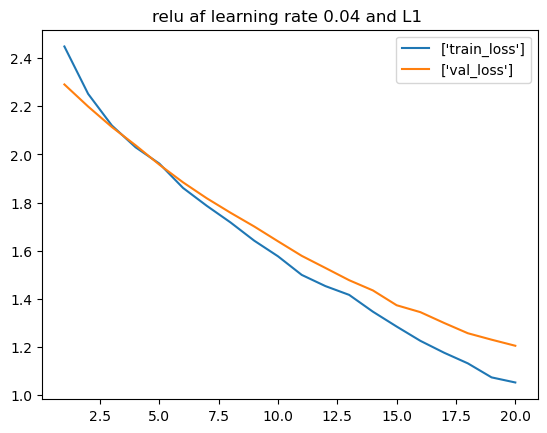

In [251]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("relu af learning rate 0.04 and L1 ")
plt.legend()
plt.show()

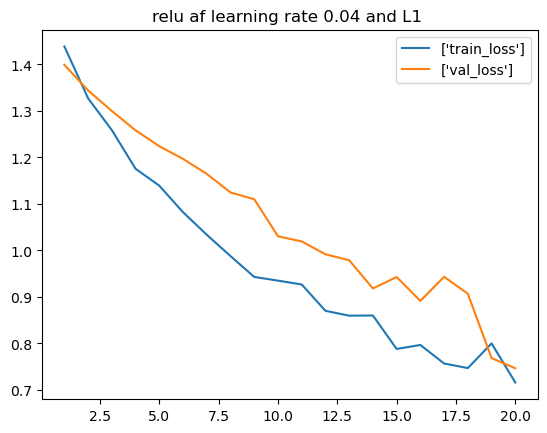

In [302]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("relu af learning rate 0.04 and L1 ")
plt.legend()
plt.show()

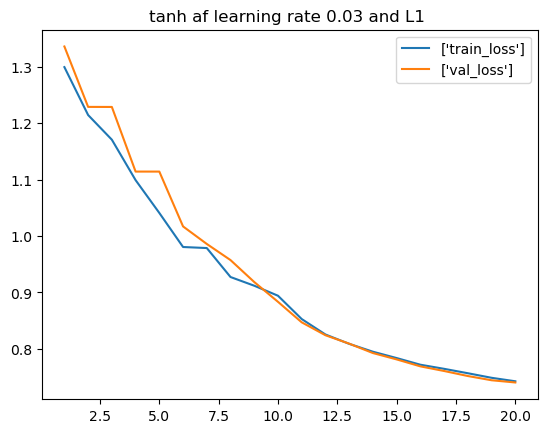

In [349]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("tanh af learning rate 0.03 and L1 ")
plt.legend()
plt.show()

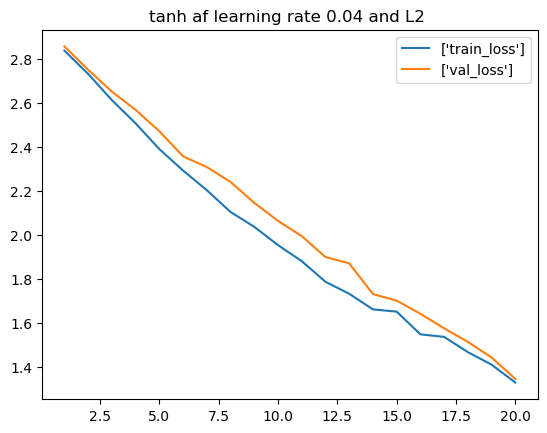

In [342]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("tanh af learning rate 0.04 and L2 ")
plt.legend()
plt.show()

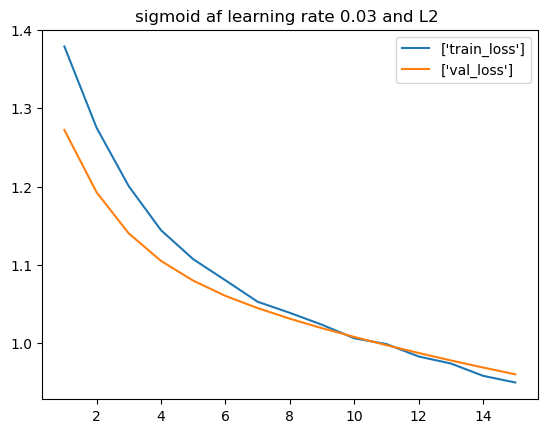

In [110]:
plt.plot(range(1,16),History.history["loss"],label=["train_loss"])
plt.plot(range(1,16),History.history["val_loss"],label=["val_loss"])
plt.title("sigmoid af learning rate 0.03 and L2 ")
plt.legend()
plt.show()

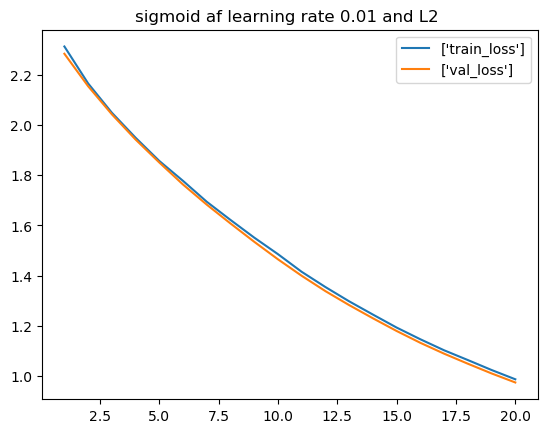

In [168]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("sigmoid af learning rate 0.01 and L2 ")
plt.legend()
plt.show()

In [350]:
# predictions on test
pred_p = model.predict(x_test)
   # these are probabilities we have to convert to values 

4/4 [==============================] - 0s 5ms/step


In [351]:
# converting the probabilities
y_test_pred = np.where(pred_p>=0.5,1,0)


In [352]:
y_test_pred.T # prdicted values

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [258]:
import warnings
warnings.filterwarnings("ignore")

In [306]:
# evalution of the test data  # relu Af 
from sklearn.metrics import accuracy_score,classification_report
print("relu activation function")
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

relu activation function
0.82
              precision    recall  f1-score   support

           0       0.92      0.70      0.80        50
           1       0.76      0.94      0.84        50

    accuracy                           0.82       100
   macro avg       0.84      0.82      0.82       100
weighted avg       0.84      0.82      0.82       100



In [353]:
# evalution of the test data  # tanh Af 
from sklearn.metrics import accuracy_score,classification_report
print("tanh activation function")

print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

tanh activation function
0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.50      1.00      0.67        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



In [346]:
# evalution of the test data  # tanh Af 
from sklearn.metrics import accuracy_score,classification_report
print("tanh activation function")

print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

tanh activation function
0.69
              precision    recall  f1-score   support

           0       0.76      0.56      0.64        50
           1       0.65      0.82      0.73        50

    accuracy                           0.69       100
   macro avg       0.70      0.69      0.68       100
weighted avg       0.70      0.69      0.68       100



In [172]:
# evalution of the test data  # sigmoid Af 
from sklearn.metrics import accuracy_score,classification_report
print("sigmoid activation function")

print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

sigmoid activation function
0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.50      1.00      0.67        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



# decision surface

9600/9600 [==============================] - 33s 3ms/step


Text(0.5, 1.0, 'decision surface of sigmoid')

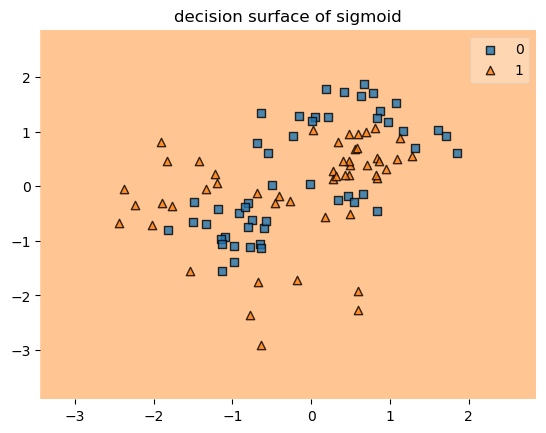

In [183]:
# 
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.values,clf=model)
plt.title("decision surface of sigmoid")

9600/9600 [==============================] - 32s 3ms/step


Text(0.5, 1.0, 'decision surface of tanh')

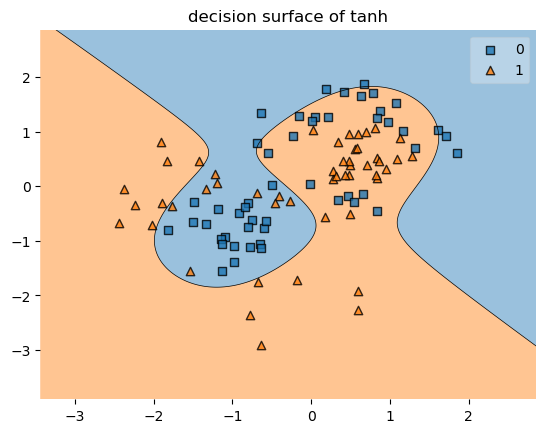

In [347]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.values,clf=model)
plt.title("decision surface of tanh")

9600/9600 [==============================] - 33s 3ms/step


Text(0.5, 1.0, 'decision surface of relu')

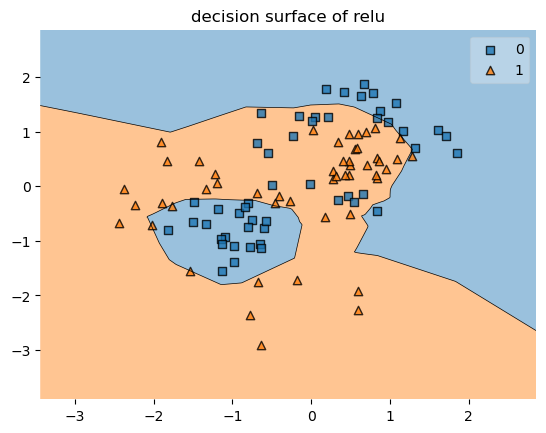

In [307]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.values,clf=model)
plt.title("decision surface of relu")